In [15]:
%matplotlib notebook

In [50]:
import numpy as np
from numpy.fft import rfft
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

## Random Points

In [97]:
rp=np.loadtxt("rand_points_steve.txt")
truncate=10000
x,y,z=rp[:truncate,0],rp[:truncate,1],rp[:truncate,2]
rp.shape,x.shape

((30396, 3), (10000,))

<IPython.core.display.Javascript object>


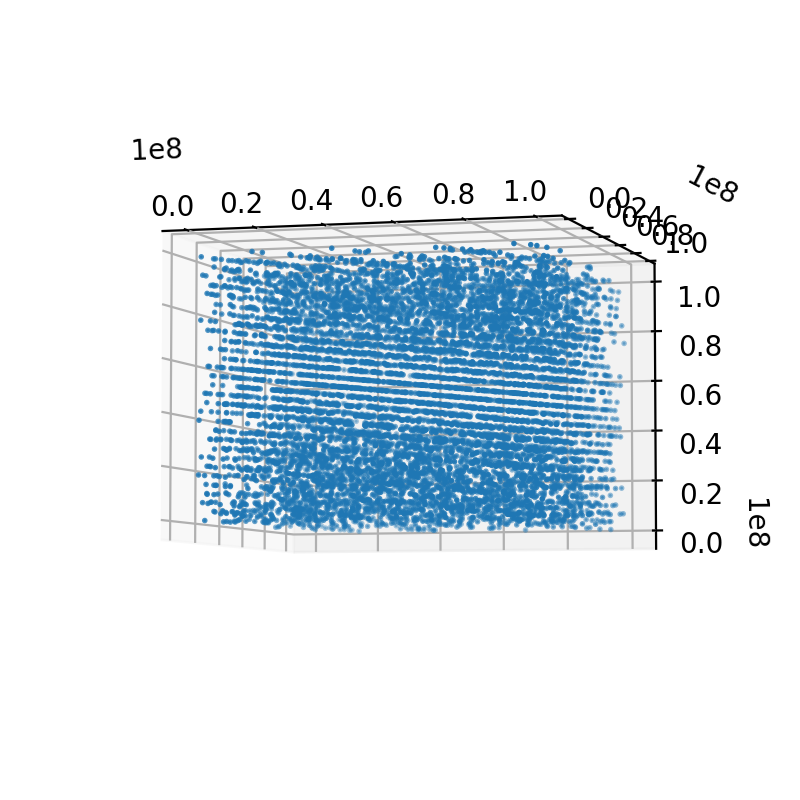

In [98]:
# rpft=np.fft.rfft(rp,axis=0)
plt.figure(figsize=(4,4))
ax = plt.axes(projection="3d")
ax.scatter3D(x,y,z,s=1)
plt.show()
# plt.clf()
# plt.plot(rp)

## Spectrum

In [49]:
def get_rhoxyz(rp,x,y,z,dx,dy,dz):
    idx0=np.where(rp[:,0]>=x-dx/2)
    idx1=np.where(rp[:,0]< x+dx/2)
    idx2=np.where(rp[:,1]>=y-dy/2)
    idx3=np.where(rp[:,1]< y+dy/2)
    idx4=np.where(rp[:,2]>=z-dz/2)
    idx5=np.where(rp[:,2]< z+dz/2)
    idxs=np.intersect1d(idx0,idx1)
    idxs=np.intersect1d(idxs,idx2)
    idxs=np.intersect1d(idxs,idx3)
    idxs=np.intersect1d(idxs,idx4)
    idxs=np.intersect1d(idxs,idx5)
    return len(rp[idxs])
n=len(rp)
nx,ny,nz = int(n**(1/3)),int(n**(1/3)),int(n**(1/3))
lx,ly,lz = max(rp[:,0])-min(rp[:,0]),max(rp[:,1])-min(rp[:,1]),max(rp[:,2])-min(rp[:,2])
dx,dy,dz = lx/nx,ly/ny,lz/nz
x=np.linspace(min(rp[:,0]),max(rp[:,0]),nx)
y=np.linspace(min(rp[:,1]),max(rp[:,1]),ny)
z=np.linspace(min(rp[:,2]),max(rp[:,2]),nz)
rho=np.zeros((nx,ny,nz))
print("nx=",nx)
for ix,i in enumerate(x):
    print("iter=",ix)
    for jx,j in enumerate(y):
        for kx,k in enumerate(z):
            rho[ix,jx,kx]=get_rhoxyz(rp,i,j,k,dx,dy,dz)

# rho=rp[np.where(rp)] # density function

nx= 31
iter= 0
iter= 1
iter= 2
iter= 3
iter= 4
iter= 5
iter= 6
iter= 7
iter= 8
iter= 9
iter= 10
iter= 11
iter= 12
iter= 13
iter= 14
iter= 15
iter= 16
iter= 17
iter= 18
iter= 19
iter= 20
iter= 21
iter= 22
iter= 23
iter= 24
iter= 25
iter= 26
iter= 27
iter= 28
iter= 29
iter= 30


In [60]:
rhoftx.shape,rhoftx[:,0,0].shape

((16, 31, 31), (16,))

(15,)


<IPython.core.display.Javascript object>


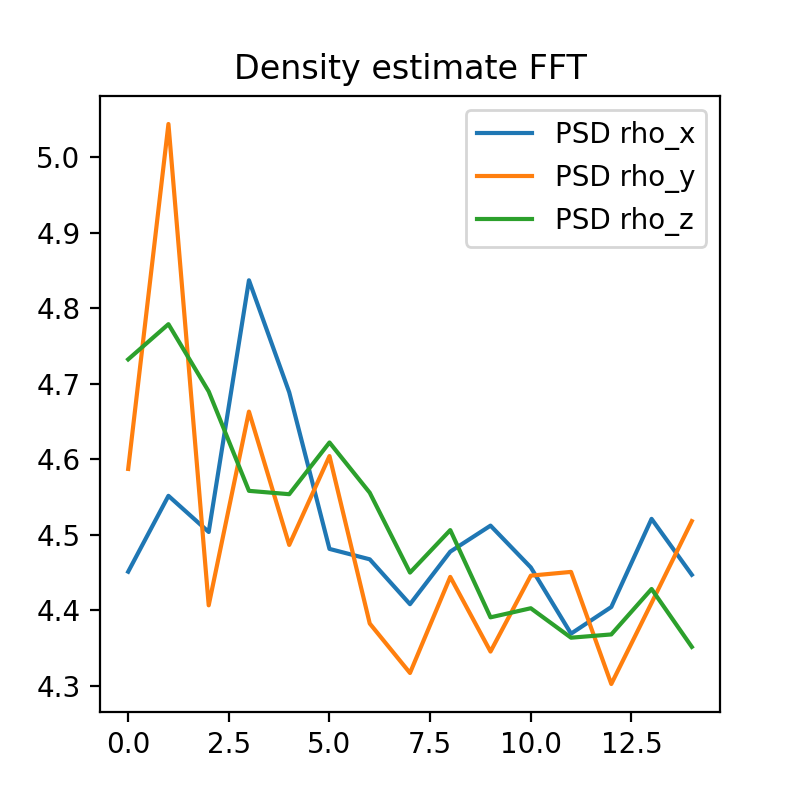

In [84]:
rhoftx=rfft(rho,axis=0)
rhoftx_mean = abs(rhoftx[1:,:,:]).mean(axis=1).mean(axis=1)
rhofty=rfft(rho,axis=1)
rhofty_mean = abs(rhofty[:,1:,:]).mean(axis=0).mean(axis=1)
rhoftz=rfft(rho,axis=2)
rhoftz_mean = abs(rhoftz[:,:,1:]).mean(axis=0).mean(axis=0)
print(rhoftx_mean.shape)
plt.figure(figsize=(4,4))
plt.title("Density estimate FFT")
plt.plot(rhoftx_mean,label="PSD rho_x")
plt.plot(rhofty_mean,label="PSD rho_y")
plt.plot(rhoftz_mean,label="PSD rho_z")
plt.legend()
plt.savefig("img/rho_spec.png",dpi=450)
# plt.show()

In [73]:
# plt.plot(abs(rhoftx).mean(axis=1).mean(axis=1))